In this notebook, I will be doing:
 1. **Exploratory Data Analysis (EDA)** to highlight several important aspects of the dataset which  will be used to answer some research questions underpinning my thesis.
 2. **Outlier Detection**
 3. **Missing Data Imputation**
 
After doing those, the final dataset (wrangled) will be fed into some models which will be compared on some accuracy metrics.

### <font color='red'> 1) Import Packages and Load Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option("display.max_rows", 6)
df = pd.read_csv("CR1_Data_Raw.csv", header=0, skiprows=0)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


### <font color='red'>2) Overview of the Dataset

In [4]:
print(f"We have {df.shape[0]} rows and {df.shape[1]} columns in our dataset.", end="\n\n")
print("The name of the columns are:\n", "\n   ".join(list(df.columns)), sep="   ")

We have 32581 rows and 12 columns in our dataset.

The name of the columns are:
   person_age
   person_income
   person_home_ownership
   person_emp_length
   loan_intent
   loan_grade
   loan_amnt
   loan_int_rate
   loan_status
   loan_percent_income
   cb_person_default_on_file
   cb_person_cred_hist_length


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


* There are 8 numeric and 4 categorical columns in the dataset.

In [6]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option("display.max_rows", None)
df.select_dtypes(include=["number"]).describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99])

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.00,32581.00,31686.00,32581.00,29465.00,32581.00,32581.00,32581.00
mean,27.73,66074.85,4.79,9589.37,11.01,0.22,0.17,5.80
std,6.35,61983.12,4.14,6322.09,3.24,0.41,0.11,4.06
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
1%,21.00,14400.00,0.00,1000.00,5.42,0.00,0.02,2.00
10%,22.00,28590.00,0.00,3000.00,6.91,0.00,0.05,2.00
25%,23.00,38500.00,2.00,5000.00,7.90,0.00,0.09,3.00
50%,26.00,55000.00,4.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,79200.00,7.00,12200.00,13.47,0.00,0.23,8.00
90%,36.00,110004.00,10.00,19000.00,15.30,1.00,0.32,11.00


* When we look at the statistics above, it can be seen that there are some outliers in some attributes which can be detected from the great differences between 99% percentile value and the maximum.

In [7]:
df.select_dtypes(include=["object"]).describe()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


* In two attributes, we have some missing (null) values, which will be treated (imputed or deleted) later in accordance with some methodologies in the literature.

In [8]:
pd.set_option("display.max_rows", None)
df.isnull().sum(axis=0)

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

### <font color='peru'> 3) Correlation Matrix

* All the values in the correlation matrix below  lead to weak linear relationship between numerical variables. Therefore, rather than statistical techniques such as logistic regression, some other advanced techniques could have more predictive value on our dataset. However, some combination of those variables could be useful when estimating via a regression model.

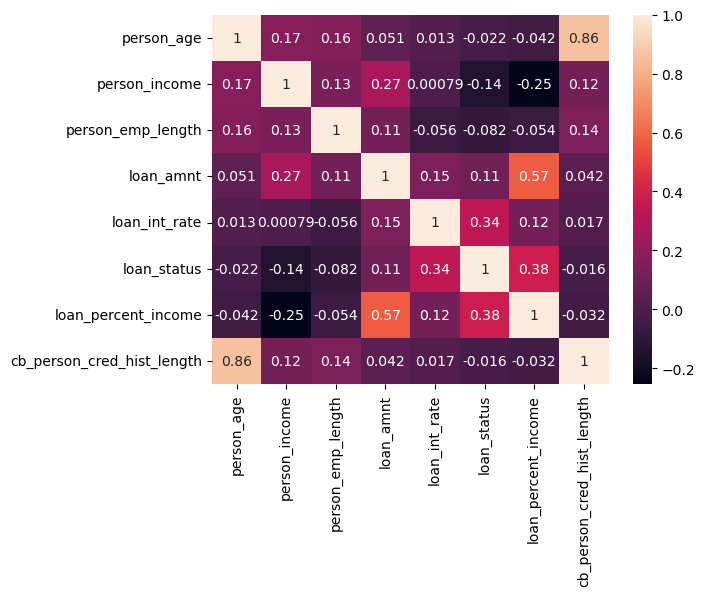

In [9]:
corr_mat = df.corr()
corr_mat

sns.heatmap(corr_mat, annot=True)
plt.show()

### <font color='peru'>4) Useful Figures

#### <font color='navyblue'> a - Loan Status

* Nearly 22% of the customers have defaulted on their loan.

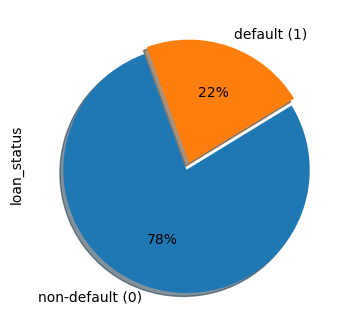

In [36]:
plt.figure(figsize=(10,4))

default_perc = (df["loan_status"].value_counts() / len(df["loan_status"]) * 100)

default_perc.plot(kind="pie", legend=False, 
                 autopct='%1.0f%%', explode=(0.05,0.01), 
                 shadow=True, labels=["non-default (0)","default (1)"],
                 startangle=110, ax=plt.subplot(111))
plt.xlabel('',fontsize=17) 
plt.show()

#### <font color='navyblue'>b - Loan Status over Loan Grade 

* As expected, better the loan grade, less the likelihood of being default on the loan

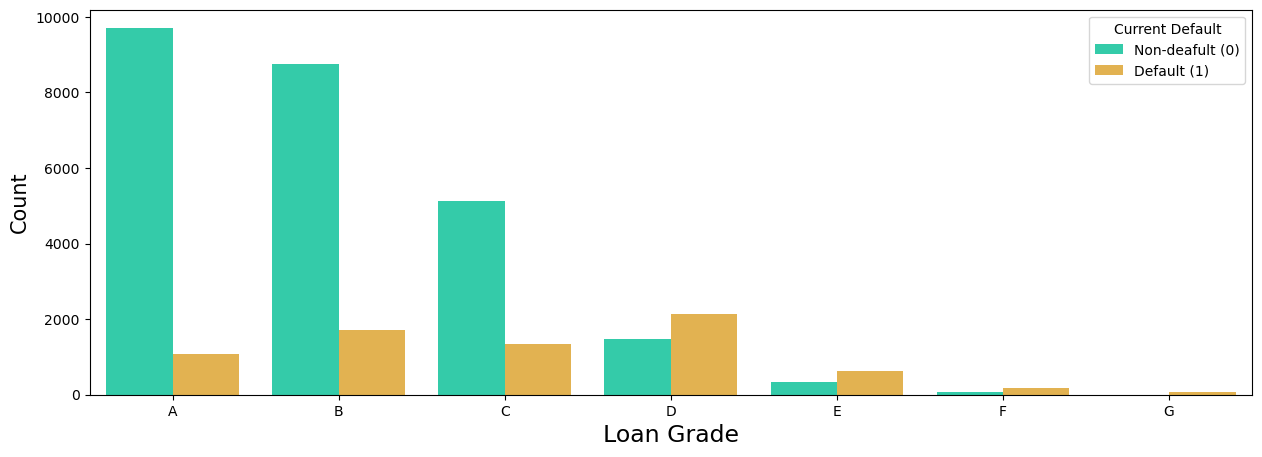

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x="loan_grade", hue="loan_status", order=["A","B","C","D","E","F","G"], palette="turbo")
plt.xlabel('Loan Grade',fontsize=17) 
plt.ylabel('Count',fontsize=15) 
plt.legend(title='Current Default', loc='upper right', labels=['Non-deafult (0)', 'Default (1)'])
plt.show()

In [13]:
from pandas import factorize

labels, categories = factorize(df["loan_grade"])
df["labels"] = labels
abs(df["loan_status"].corr(df["labels"]))

0.13237278223057694

#### <font color='navyblue'>c - Loan Status over Home Ownership

* default/non-default ratio is the highest in the category **"RENT"**.

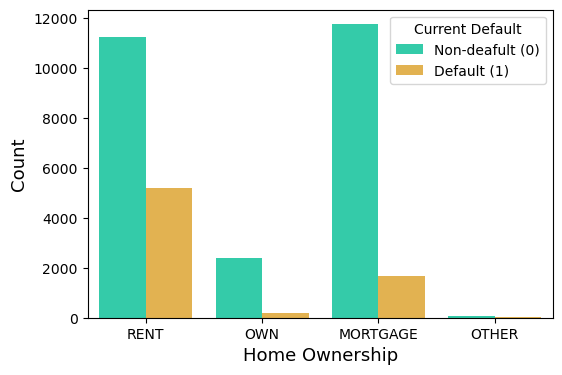

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="person_home_ownership", hue="loan_status", palette="turbo")
plt.xlabel('Home Ownership',fontsize=13) 
plt.ylabel('Count',fontsize=13) 
plt.legend(title='Current Default', loc='upper right', labels=['Non-deafult (0)', 'Default (1)'])
plt.show()

In [14]:
labels, categories = factorize(df["person_home_ownership"])
df["labels"] = labels
abs(df["loan_status"].corr(df["labels"]))

0.21871372738641676

#### <font color='navyblue'>d - Loan Status over Loan Intent

* default/non-default ratio is the highest in the category **"DEBTCONSOLIDATION"**.

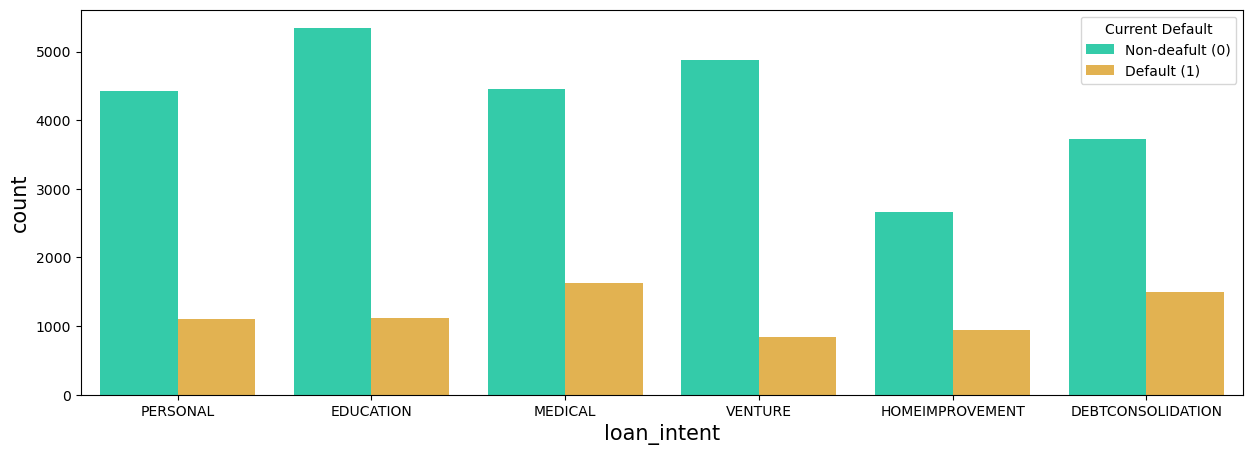

In [25]:
plt.figure(figsize=(15,5))
plt.xlabel('Deafult',fontsize=15) 
plt.ylabel('Count',fontsize=15) 
sns.countplot(data=df, x="loan_intent", hue="loan_status", palette="turbo")
plt.legend(title='Current Default', loc='upper right', labels=['Non-deafult (0)', 'Default (1)'])
plt.show()

In [12]:
from pandas import factorize

labels, categories = factorize(df["loan_intent"])
df["labels"] = labels
abs(df["loan_status"].corr(df["labels"]))

0.06538102138982256

#### <font color='navyblue'>e - Loan Status over Past Defaults

* Having historical default could be an important sign for the next situation of the customer on his loan. 

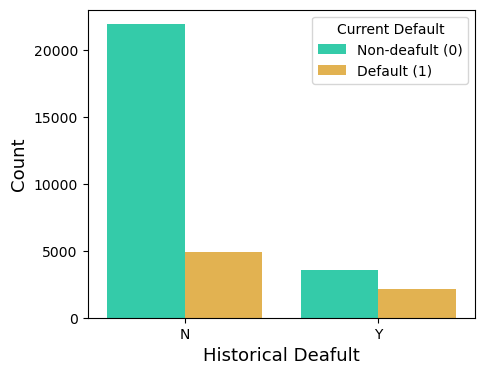

In [37]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="cb_person_default_on_file", hue="loan_status", order=["N", "Y"], palette="turbo")
plt.legend(title='Current Default', loc='upper right', labels=['Non-deafult (0)', 'Default (1)'])
plt.xlabel('Historical Deafult',fontsize=13) 
plt.ylabel('Count',fontsize=13) 
plt.show()

#### <font color='navyblue'>f -  Loan/Income Distribution by Loan Status

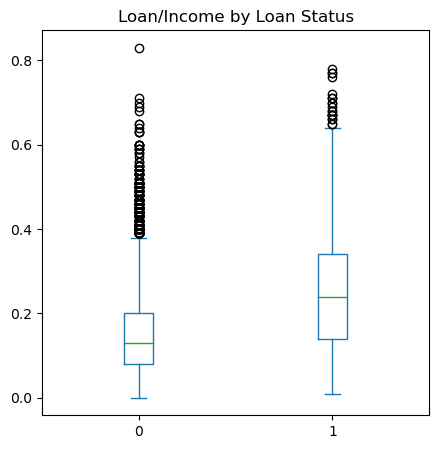

In [15]:
df.plot(kind="box", column = ['loan_percent_income'], by = 'loan_status', figsize=(5, 5))
plt.title('Loan/Income by Loan Status')
plt.suptitle('')

plt.show()

#### <font color='navyblue'>g - person_age - cb_person_cred_hist_length

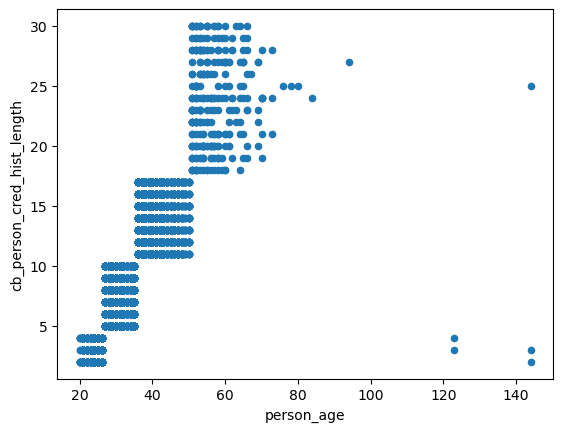

In [16]:
df.plot(kind="scatter", y="cb_person_cred_hist_length", x="person_age")
plt.show()

#### <font color='navyblue'>h - Distribution of Ages

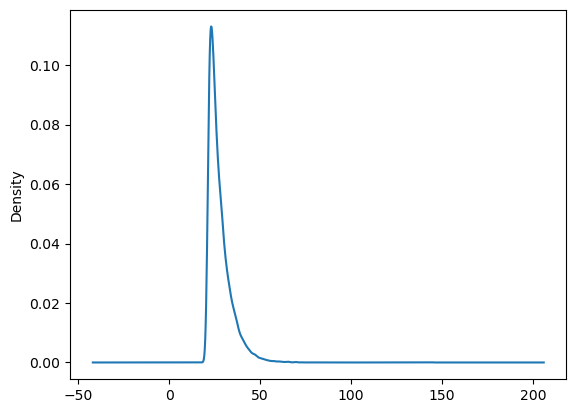

In [17]:
df["person_age"].plot.kde()

plt.show()

### <font color='peru'>5) Some Pivot Analysis on the Data

In [18]:
pd.crosstab(df["loan_grade"], [df["cb_person_default_on_file"], df["loan_status"]])

cb_person_default_on_file     N           Y      
loan_status                   0     1     0     1
loan_grade                                       
A                          9704  1073     0     0
B                          8750  1701     0     0
C                          2504   698  2615   641
D                           736  1014   749  1127
E                           169   330   174   291
F                            37    92    34    78
G                             0    28     1    35

In [19]:
pd.crosstab(df["loan_grade"], df["cb_person_default_on_file"], values=df["loan_status"], aggfunc="mean")

cb_person_default_on_file,N,Y
loan_grade,,
A,0.099564,NaN
B,0.162760,NaN
C,0.217989,0.196867
D,0.579429,0.600746
E,0.661323,0.625806
F,0.713178,0.696429
G,1.000000,0.972222


In [20]:
pd.crosstab(df["person_home_ownership"], df["loan_status"], normalize="index").round(2)

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.87,0.13
OTHER,0.69,0.31
OWN,0.93,0.07
RENT,0.68,0.32


In [21]:
pd.crosstab(df['loan_status'], df['person_home_ownership'],
            values=df['person_emp_length'], aggfunc=['min','max'])

min                      max                   
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN   RENT
loan_status                                                               
0                          0.0   0.0  0.0  0.0    123.0  24.0  31.0   41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  123.0

### <font color='peru'>6) Outlier Detection

* As it is clearly seen from the figure below, there are a few outliers, which could have emerged due to some reasons (a.g. typo). As there are very less outliers in this regard, we can simply drop those data points from the dataset.

<Figure size 300x300 with 0 Axes>

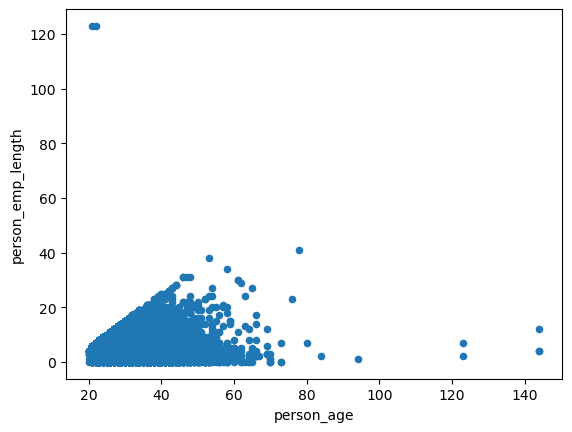

In [22]:
plt.figure(figsize=(3,3))

df.plot.scatter(y="person_emp_length", x="person_age")

plt.show()

* As the ages bigger than 120 are seen extremely rarely in real life, we dropped their corresponding data records.

In [23]:
indices=df[df["person_age"]>=120].index
df.drop(indices, inplace=True)

* Due to some legal reasons, a person cannot start his/her employment before at some specific ages. In this case, that threshold is chosen to be 15 (making it 10 or 20 does not make any difference in our case). If we sum this threshold and the employment length up, we would get the minimum age that person can be. So, if the given age is below this figure, that means there is an error there, and the corresponding row should be removed from the dataset.

In [24]:
indices=df[df["person_emp_length"]+15>df["person_age"]].index
df.drop(indices, inplace=True)

By performing the actions above, we would have deleted only 7 records out of 32.5k data points, which can be safely neglected.

In [25]:
df.shape

(32574, 12)

We only have one customer more than 90, which makes sense now considering the reality. The distribution of the age below validates this as well.

In [26]:
df["person_age"].nlargest(10).value_counts()

73    3
70    2
94    1
84    1
80    1
78    1
76    1
Name: person_age, dtype: int64

### <font color='peru'>7) Missing Value Treatment

Print an array of columns with null values

In [27]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

person_emp_length     895
loan_int_rate        3115
dtype: int64

* A popular approach to missing data imputation is to use a model to predict the missing values. This requires a model to be created for each input variable that has missing values. Although any one among a range of different models can be used to predict the missing values, the k-nearest neighbor (KNN) algorithm has proven to be generally effective, often referred to as “nearest neighbor imputation.”

* For all rows in which the target column is not missing, the scikit learn trains a regression model using the other columns as predicors. To put in another way, the null values under the target colun are predicted via a regression model which is trained by data points which have a value under that target column. A good way to modify the text data is to perform one-hot encoding or create “dummy variables”. The idea is to convert each category into a binary data column by assigning a 1 or 0. Other options would be to use LabelEncoder or OrdinalEncoder from Scikit-Learn’s preprocessing package.

* The KNN Imputer does not recognize text data values. It will generate errors if we do not change these values to numerical values. 

In [28]:
cat_variables = df[["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]]
cat_dummies = pd.get_dummies(cat_variables, drop_first=True)
cat_dummies.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [29]:
cat_dummies.shape

(32574, 15)

In [30]:
new_df = df.drop(["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"], axis=1)
new_df = pd.concat([new_df, cat_dummies], axis=1)
new_df.shape

(32574, 23)

* Another critical point here is that the KNN Imptuer is a distance-based imputation method and it requires us to normalize our data. Otherwise, the different scales of our data will lead the KNN Imputer to generate biased replacements for the missing values. For simplicity, we will use Scikit-Learn’s MinMaxScaler which will scale our variables to have values between 0 and 1.

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
new_df = pd.DataFrame(scaler.fit_transform(new_df), columns = new_df.columns)
new_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,0.013514,0.002751,0.121951,0.014493,0.321348,0.0,0.120482,0.000000,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.067568,0.002751,0.024390,0.144928,0.418539,1.0,0.686747,0.035714,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.040541,0.030209,0.097561,1.000000,0.551124,1.0,0.638554,0.000000,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.054054,0.024757,0.195122,1.000000,0.497191,1.0,0.662651,0.071429,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.013514,0.002898,0.048780,0.057971,0.096629,1.0,0.301205,0.000000,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
new_df = pd.DataFrame(imputer.fit_transform(new_df),columns = new_df.columns)

In [33]:
new_df.isna().sum()

person_age                     0
person_income                  0
person_emp_length              0
loan_amnt                      0
loan_int_rate                  0
loan_status                    0
loan_percent_income            0
cb_person_cred_hist_length     0
person_home_ownership_OTHER    0
person_home_ownership_OWN      0
person_home_ownership_RENT     0
loan_intent_EDUCATION          0
loan_intent_HOMEIMPROVEMENT    0
loan_intent_MEDICAL            0
loan_intent_PERSONAL           0
loan_intent_VENTURE            0
loan_grade_B                   0
loan_grade_C                   0
loan_grade_D                   0
loan_grade_E                   0
loan_grade_F                   0
loan_grade_G                   0
cb_person_default_on_file_Y    0
dtype: int64

In [34]:
new_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,0.013514,0.002751,0.121951,0.014493,0.321348,0.0,0.120482,0.000000,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.067568,0.002751,0.024390,0.144928,0.418539,1.0,0.686747,0.035714,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.040541,0.030209,0.097561,1.000000,0.551124,1.0,0.638554,0.000000,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.054054,0.024757,0.195122,1.000000,0.497191,1.0,0.662651,0.071429,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.013514,0.002898,0.048780,0.057971,0.096629,1.0,0.301205,0.000000,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
new_df_1 = scaler.inverse_transform(new_df)
new_df_1 = pd.DataFrame(new_df_1, columns=new_df.columns)
new_df_1.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,21.0,9600.0,5.0,1000.0,11.14,0.0,0.10,2.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25.0,9600.0,1.0,5500.0,12.87,1.0,0.57,3.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,23.0,65500.0,4.0,35000.0,15.23,1.0,0.53,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,24.0,54400.0,8.0,35000.0,14.27,1.0,0.55,4.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,21.0,9900.0,2.0,2500.0,7.14,1.0,0.25,2.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
filled_cols = new_df_1[["loan_int_rate","person_emp_length"]]

In [37]:
df = df.reset_index(drop=True)
df.index

RangeIndex(start=0, stop=32574, step=1)

In [38]:
new_df = pd.concat([df.drop(["loan_int_rate","person_emp_length"], axis=1), filled_cols], axis=1)

In [39]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32574 entries, 0 to 32573
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32574 non-null  int64  
 1   person_income               32574 non-null  int64  
 2   person_home_ownership       32574 non-null  object 
 3   loan_intent                 32574 non-null  object 
 4   loan_grade                  32574 non-null  object 
 5   loan_amnt                   32574 non-null  int64  
 6   loan_status                 32574 non-null  int64  
 7   loan_percent_income         32574 non-null  float64
 8   cb_person_default_on_file   32574 non-null  object 
 9   cb_person_cred_hist_length  32574 non-null  int64  
 10  loan_int_rate               32574 non-null  float64
 11  person_emp_length           32574 non-null  float64
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [40]:
new_df.to_csv("CR1_Data_Processed.csv", index=False)